### 5.1) Harmonic chain with PBC
We analyze a one-dimensional harmonic chain of $N$ beads connected by springs, each with mass $m$, spring constant $k$, and natural bond length $\ell = 1$. The energy scale is set by $\varepsilon = k \ell^2$, and time is scaled by $\sqrt{m/k}$, introducing this time periodic boundary conditions. 

#### a) Hamiltonian solution of linear chain

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from integrators.velocity_verlet import velocity_verlet_simulation_pbc
plt.rc('font', family='serif', serif='PT Serif')
plt.rc('legend', frameon=False, numpoints=1, fontsize=10, labelspacing=0.2, handlelength=2, handletextpad=0.5,
       borderaxespad=0.5)
plt.rc('figure', figsize=(4, 4))
plt.rc('xtick', direction='in', top=True)
plt.rc('ytick', direction='in', right=True)
plt.rc('xtick.minor', visible=True, top=True)
plt.rc('ytick.minor', visible=True, right=True)
plt.rc('axes', linewidth=0.7)
plt.rc('lines', linewidth=1, markersize=2, markeredgewidth=0)
plt.rc('ps', usedistiller='xpdf')

# Parameters
N = 11
k = 1.0
m = 1.0
epsilon = 1.0
omega_0_inv = np.sqrt(m / k)
dt = 0.01 * omega_0_inv
t_sim = 100 * omega_0_inv

res = velocity_verlet_simulation_pbc(
    N, dt, t_sim, k, m, beta=1.0, config="linear",
    random_momenta=False, return_energy=True, L=11.0, apply_pbc=True, close_chain=False)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-k2jg2s78 because the default path (/home/mi/marcelli/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Integrating: 100%|██████████| 10000/10000 [00:02<00:00, 3436.52it/s]


In [3]:
def unwrap_positions(positions, L):
    """
    Incrementally unwrap positions during iteration.
    wrapped_positions: (steps, N, 3)
    L: box size
    Returns: unwrapped_positions (same shape)
    """
    steps, N, D = positions.shape
    unwrapped = np.zeros_like(positions)
    unwrapped[0] = positions[0]

    for t in range(1, steps):
        delta = positions[t] - positions[t - 1]
        # Correct for PBC jumps in each dimension
        delta = np.where(delta > L / 2, delta - L,
                np.where(delta < -L / 2, delta + L, delta))
        unwrapped[t] = unwrapped[t - 1] + delta

    return unwrapped


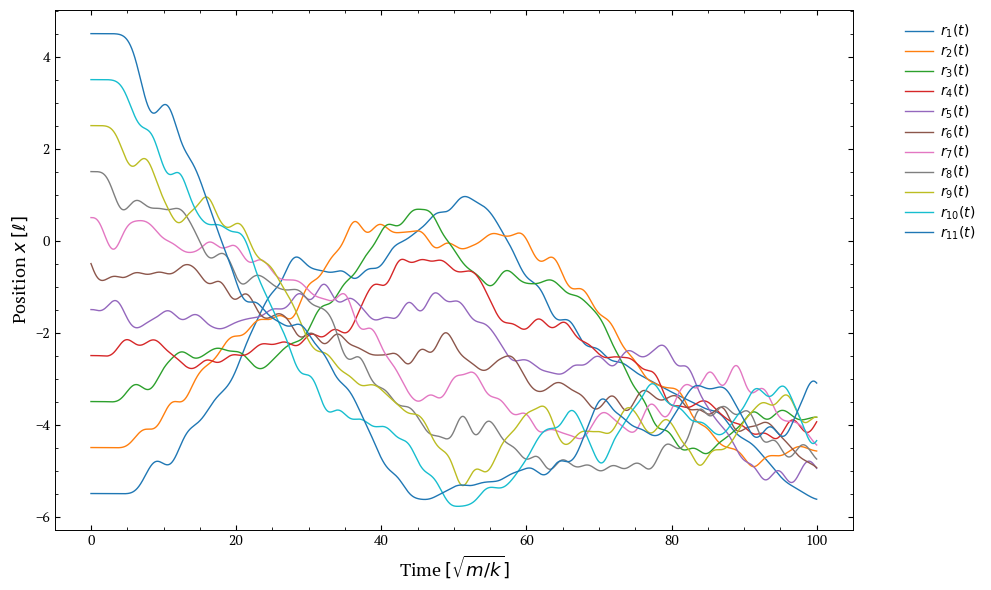

In [4]:
positions = unwrap_positions(res["r_traj"], L=11.0)
# Time array
time = np.arange(positions.shape[0]) * dt

# Plot positions
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(time, positions[:, i, 0], label=f"$r_{{{i+1}}}(t)$")
plt.xlabel(r"Time $[\sqrt{m/k}]$",fontsize=13)
plt.ylabel(r"Position $x \; [\ell]$", fontsize=13)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


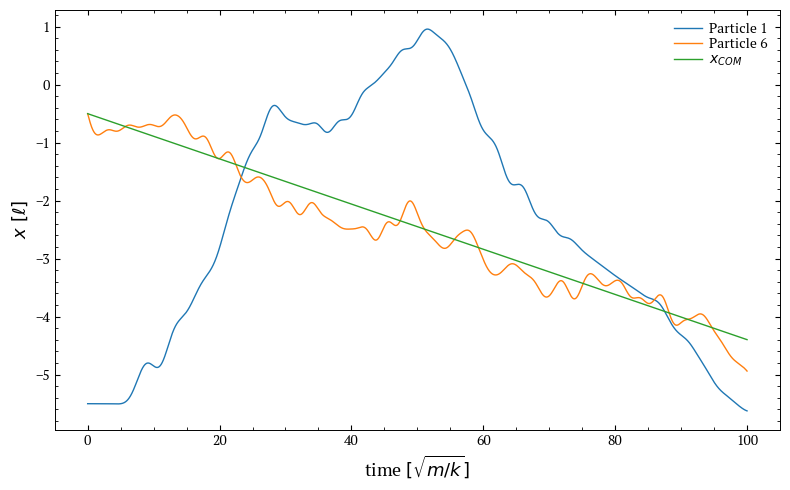

In [5]:
com = np.mean(positions, axis=1)  # shape (timesteps, 3)

plt.figure(figsize=(8, 5))
plt.plot(time, positions[:, 0, 0], label="Particle 1")
plt.plot(time, positions[:, 5, 0], label="Particle 6")
plt.plot(time, com[:, 0], label="$x_{COM}$")
plt.xlabel(r"time $[\sqrt{m/k}]$", fontsize=13)
plt.ylabel(r"$x ~[\ell]$", fontsize=13)
plt.legend()
plt.tight_layout()
plt.show()



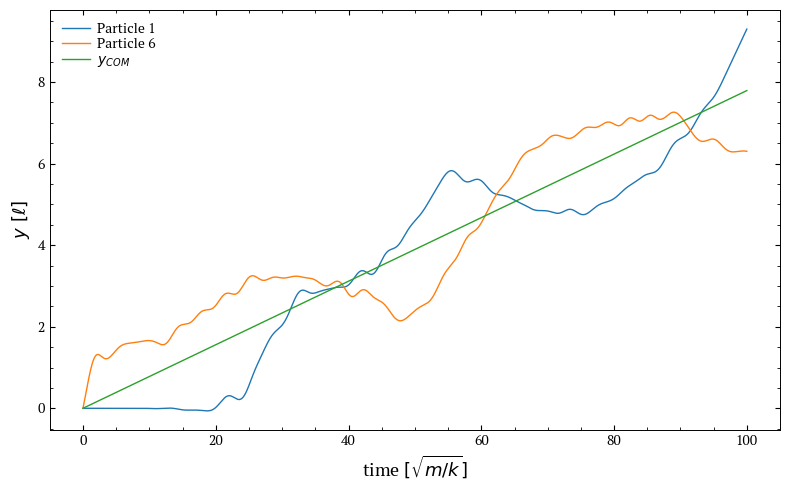

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(time, positions[:, 0, 1], label="Particle 1")
plt.plot(time, positions[:, 5, 1], label="Particle 6")
plt.plot(time, com[:, 1], label="$y_{COM}$")
plt.xlabel(r"time $[\sqrt{m/k}]$", fontsize=13)
plt.ylabel(r"$y ~[\ell]$", fontsize=13)
plt.legend()
plt.tight_layout()
plt.show()


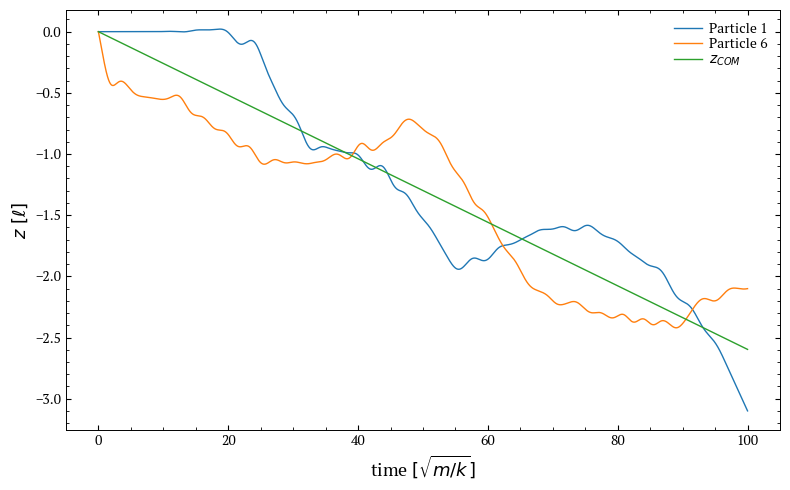

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(time, positions[:, 0, 2], label="Particle 1")
plt.plot(time, positions[:, 5, 2], label="Particle 6")
plt.plot(time, com[:, 2], label="$z_{COM}$")
plt.xlabel(r"time $[\sqrt{m/k}]$", fontsize=13)
plt.ylabel(r"$z ~[\ell]$", fontsize=13)
plt.legend()
plt.tight_layout()
plt.show()

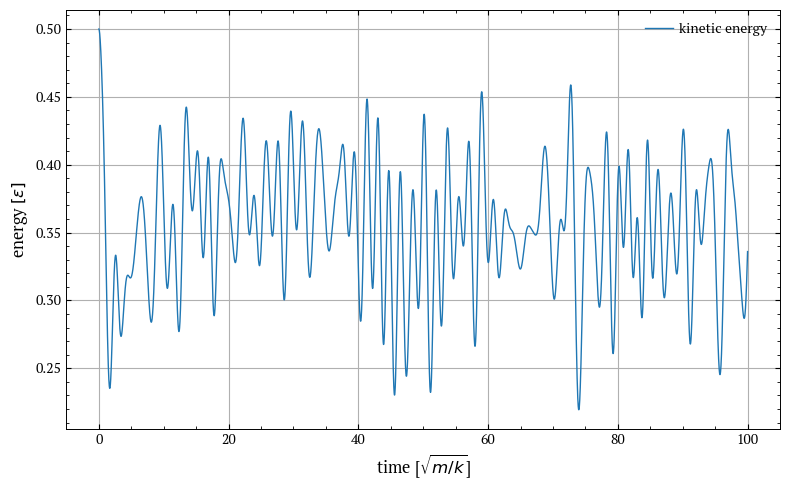

In [7]:
energy = res["energy_traj"]
pot = res["energy_pot"]
time = np.arange(len(energy)) * dt  

plt.figure(figsize=(8, 5))
plt.plot(time, energy , label="kinetic energy")
#plt.plot(time, pot, label="potential energy")
#plt.plot(time, energy + pot, label='total')
plt.xlabel(r"time [$\sqrt{m/k}$]", fontsize=12)
plt.ylabel("energy $[\epsilon]$", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#### b) Hamiltonian solutionof closed chain

In [8]:
res_closed = velocity_verlet_simulation_pbc(
    N, dt, t_sim, k, m, beta=1.0, config="linear",
    random_momenta=False, return_energy=True, L=11.0, apply_pbc=True, close_chain=True)

Integrating: 100%|██████████| 10000/10000 [00:03<00:00, 3186.98it/s]


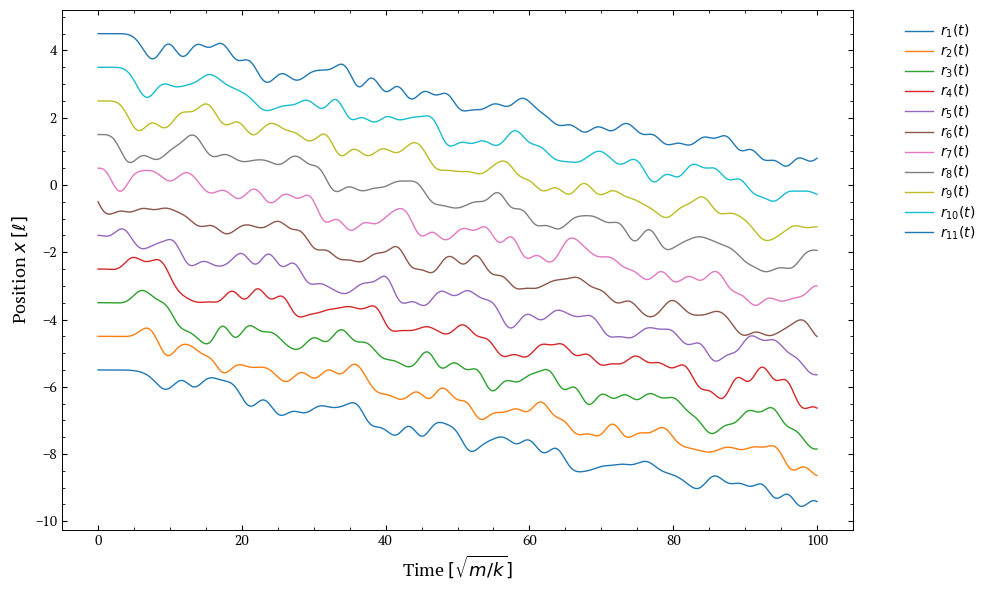

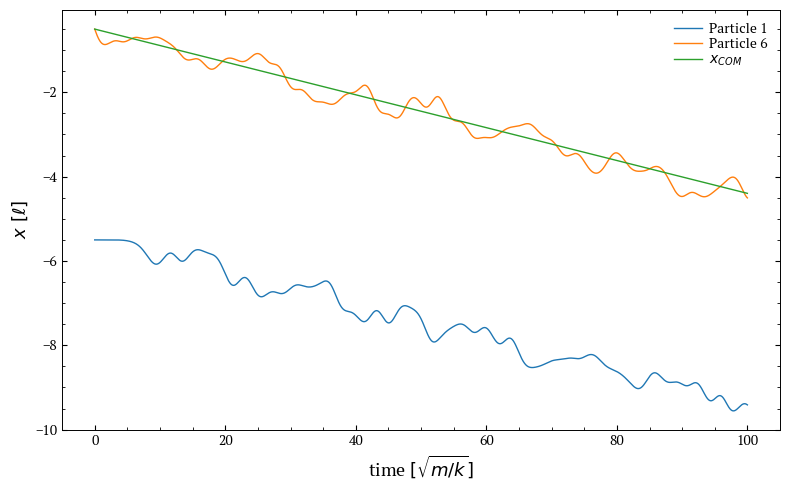

In [9]:
positions = unwrap_positions(res_closed["r_traj"], L=11.0)
# Time array
time = np.arange(positions.shape[0]) * dt
com = np.mean(positions, axis=1)  # shape (timesteps, 3)

# Plot positions
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(time, positions[:, i, 0], label=f"$r_{{{i+1}}}(t)$")
plt.xlabel(r"Time $[\sqrt{m/k}]$",fontsize=13)
plt.ylabel(r"Position $x \; [\ell]$", fontsize=13)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(time, positions[:, 0, 0], label="Particle 1")
plt.plot(time, positions[:, 5, 0], label="Particle 6")
plt.plot(time, com[:, 0], label="$x_{COM}$")
plt.xlabel(r"time $[\sqrt{m/k}]$", fontsize=13)
plt.ylabel(r"$x ~[\ell]$", fontsize=13)
plt.legend()
plt.tight_layout()
plt.show()

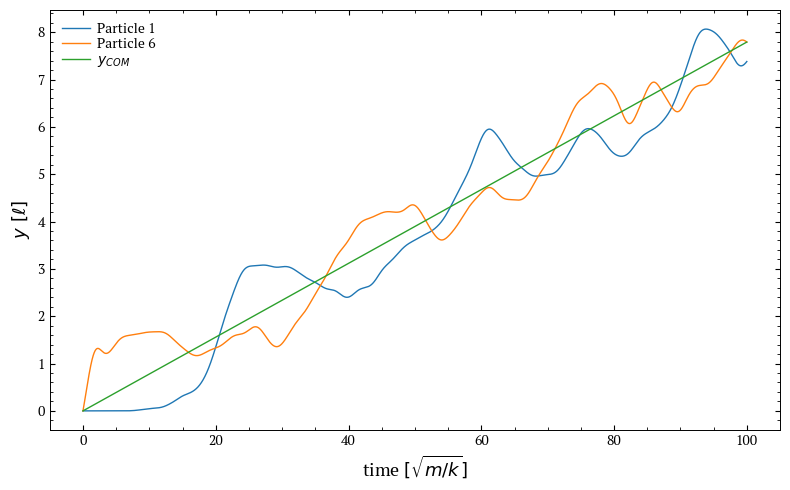

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(time, positions[:, 0, 1], label="Particle 1")
plt.plot(time, positions[:, 5, 1], label="Particle 6")
plt.plot(time, com[:, 1], label="$y_{COM}$")
plt.xlabel(r"time $[\sqrt{m/k}]$", fontsize=13)
plt.ylabel(r"$y ~[\ell]$", fontsize=13)
plt.legend()
plt.tight_layout()
plt.show()

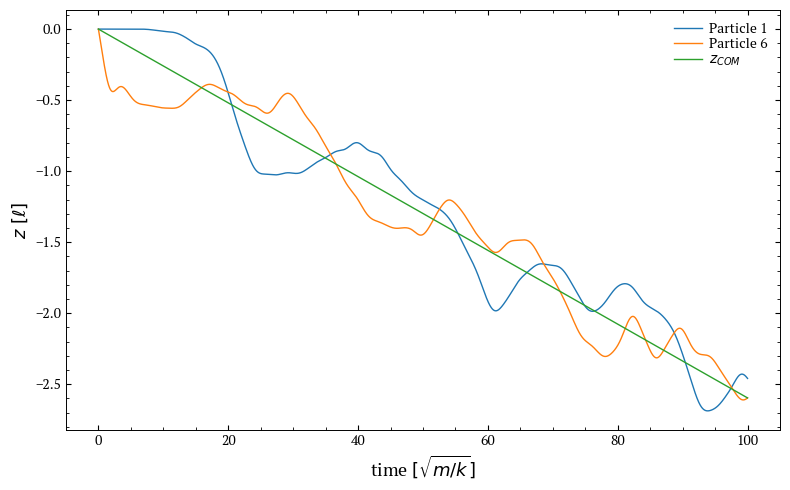

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(time, positions[:, 0, 2], label="Particle 1")
plt.plot(time, positions[:, 5, 2], label="Particle 6")
plt.plot(time, com[:, 2], label="$z_{COM}$")
plt.xlabel(r"time $[\sqrt{m/k}]$", fontsize=13)
plt.ylabel(r"$z ~[\ell]$", fontsize=13)
plt.legend()
plt.tight_layout()
plt.show()


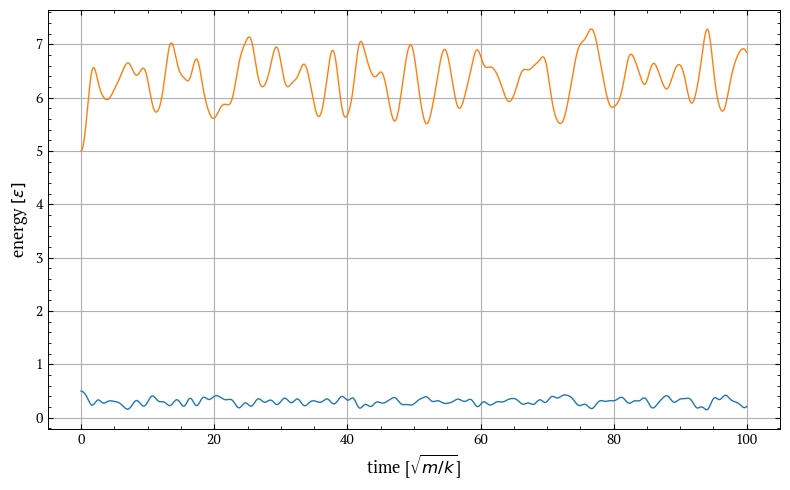

In [12]:
energy = res_closed["energy_traj"]
pot = res_closed["energy_pot"]
time = np.arange(len(energy)) * dt  

plt.figure(figsize=(8, 5))
plt.plot(time, energy, label="kinetic energy")
plt.plot(time, pot, label="potential energy")
plt.xlabel(r"time [$\sqrt{m/k}$]", fontsize=12)
plt.ylabel("energy $[\epsilon]$", fontsize=12)
plt.grid(True)
#plt.legend()
plt.tight_layout()
plt.show()


### 5.2) Lennard Jones fluid

#### a) Hamiltonian solution for $\Delta t =0.002 \tau$ and $\Delta t'=2 \Delta t$

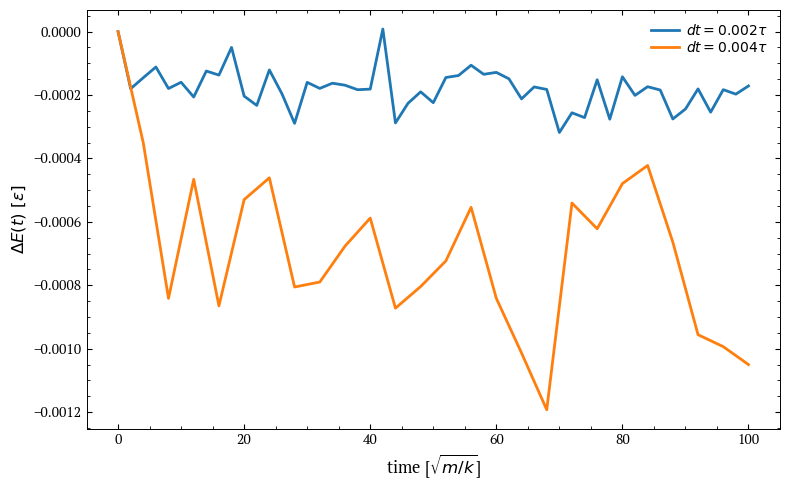

In [13]:
import h5py

h5_files = ['data_problem5/lennard_jones_equilibration__T1.50_dt0.002.h5', 'data_problem5/lennard_jones_equilibration__T1.50_dt0.004.h5']
labels = [r"$dt = 0.002 \tau$", r"$dt = 0.004 \tau$"]

# Plot energy drift
plt.figure(figsize=(8, 5))
for file, label in zip(h5_files, labels):
    with h5py.File(file, "r") as f:
        time = f["observables/internal_energy/time"][()]
        E_int = f["observables/internal_energy/value"][()]
        plt.plot(time, E_int - E_int[0], label=label, linewidth=2.0)

plt.xlabel(r"time [$\sqrt{m/k}$]", fontsize=12)
plt.ylabel(r"$\Delta E(t) ~[\epsilon]$", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

#### b) CPU runtime

In [14]:
import re

log_template = "data_problem5/lennard_jones_equilibration__T1.50_dt0.002_k{}.log"

# Header with fixed-width columns
header = "{:<3} {:>12} {:>8} {:>12} {:>8}".format("k", "N_particles", "L_box", "runtime", "units")
print(header)
print("-" * len(header))

# Lists to store parsed values
runtime_list = []
N_list = []

# Process each log file
for k in range(1, 5):
    log_file = log_template.format(k)

    try:
        with open(log_file, "r") as f:
            content = f.read()

        # Match runtime value and unit
        match = re.search(r"total\s+simulation\s+runtime:\s*([\d.]+)\s*(ms|s|min)", content, re.IGNORECASE)
        if not match:
            raise ValueError(f"No runtime found in {log_file}")

        runtime_val = float(match.group(1))
        unit = match.group(2)

        # Normalize runtime to milliseconds
        if unit == "ms":
            runtime_ms = runtime_val
        elif unit == "s":
            runtime_ms = runtime_val * 1000
        elif unit == "min":
            runtime_ms = runtime_val * 60000
        else:
            raise ValueError(f"Unknown time unit '{unit}' in {log_file}")

        # Particle and box size
        N_particles = 4 ** (3 * k)
        L_box = 2 ** k

        # Append extracted data
        runtime_list.append(runtime_ms)
        N_list.append(N_particles)

        # Print aligned info
        line = "{:<3} {:>12} {:>8} {:>12.3f} {:>8}".format(k, N_particles, L_box, runtime_val, unit)
        print(line)

    except FileNotFoundError:
        print(f"[missing] {log_file}")
    except Exception as e:
        print(f"[error] {log_file}: {e}")


k    N_particles    L_box      runtime    units
-----------------------------------------------
1             64        2      356.407       ms
2           4096        4        4.120        s
3         262144        8        4.232      min
[error] data_problem5/lennard_jones_equilibration__T1.50_dt0.002_k4.log: No runtime found in data_problem5/lennard_jones_equilibration__T1.50_dt0.002_k4.log


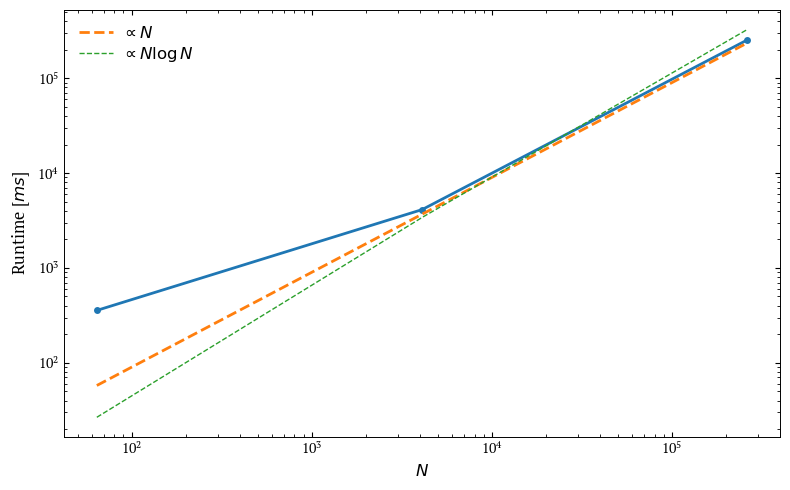

In [27]:
plt.figure(figsize=(8, 5))
plt.loglog(N_list, runtime_list, marker='o', linewidth=2.0,markersize=5.)
plt.loglog(N_list, 0.9*np.array(N_list), '--', linewidth=2.0, label='$\propto N$')
plt.loglog(N_list, 0.1*np.array(N_list)*np.log(np.array(N_list)), '--', linewidth=1.0, label='$\propto N \log N$')

plt.ylabel(r"Runtime [$ms$]", fontsize=12)
plt.xlabel(r"$N$", fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

#### c) Repeat a) with N=64 for three different seeds of random number generator

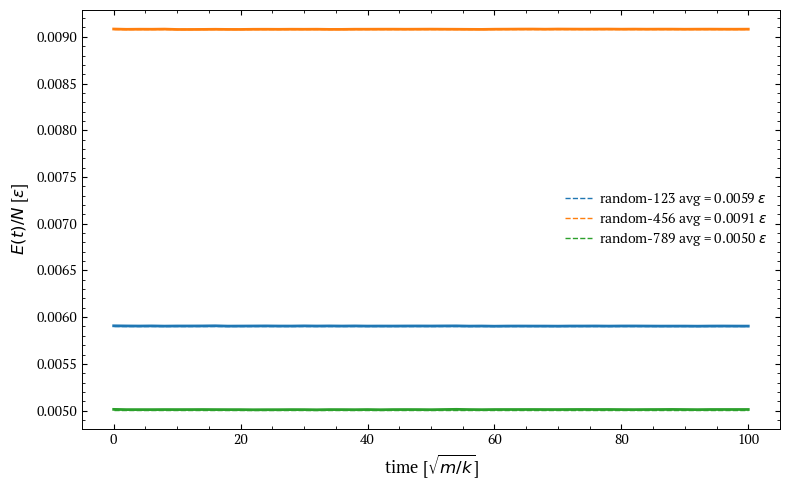

In [39]:
h5_files = [
    'data_problem5/lennard_jones_equilibration__T1.50_dt0.002_random123.h5',
    'data_problem5/lennard_jones_equilibration__T1.50_dt0.002_random456.h5',
    'data_problem5/lennard_jones_equilibration__T1.50_dt0.002_random789.h5'
]
labels = ["random-123", "random-456", "random-789"]
N = 64

plt.figure(figsize=(8, 5))

for file, label in zip(h5_files[:], labels[:]):
    with h5py.File(file, "r") as f:
        time = f["observables/internal_energy/time"][()]
        E_int = f["observables/internal_energy/value"][()]
        E_per_particle = E_int / N

        # Skip initial 10% to avoid transients
        skip = int(0.1 * len(E_per_particle))
        E_avg = np.mean(E_per_particle[skip:])

         # Plot main line and store color
        line, = plt.plot(time, E_per_particle, linewidth=2.0)
        color = line.get_color()

        plt.hlines(E_avg, xmin=time[0], xmax=time[-1], linestyles='dashed', colors=color, label=f"{label} avg = {E_avg:.4f} $\epsilon$")
plt.xlabel(r"time [$\sqrt{m/k}$]", fontsize=12)
plt.ylabel(r"$E(t)/N$ [$\epsilon$]", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


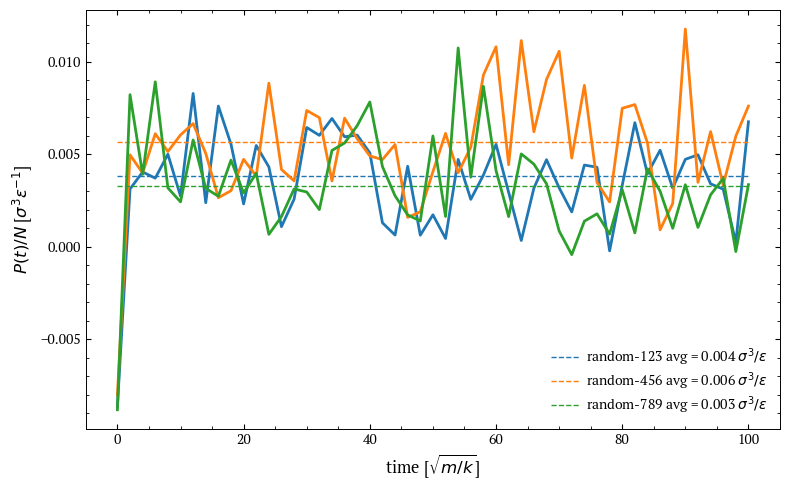

In [30]:
plt.figure(figsize=(8, 5))

for file, label in zip(h5_files, labels):
    with h5py.File(file, "r") as f:
        time = f["observables/pressure/time"][()]
        P = f["observables/pressure/value"][()]
        P_per_particle = P / N

        # Skip initial 10% for average
        skip = int(0.1 * len(P_per_particle))
        P_avg = np.mean(P_per_particle[skip:])

        # Plot and capture color
        line, = plt.plot(time, P_per_particle, linewidth=2.0)
        color = line.get_color()

        # Plot dashed line for average
        plt.hlines(P_avg, xmin=time[0], xmax=time[-1],
                   linestyles='dashed', colors=color,
                   label=f"{label} avg = {P_avg:.3f} $\sigma^3 / \epsilon$")

plt.xlabel(r"time [$\sqrt{m/k}$]", fontsize=12)
plt.ylabel(r"$P(t)/N$ [$\sigma^3 \epsilon^{-1}$]", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

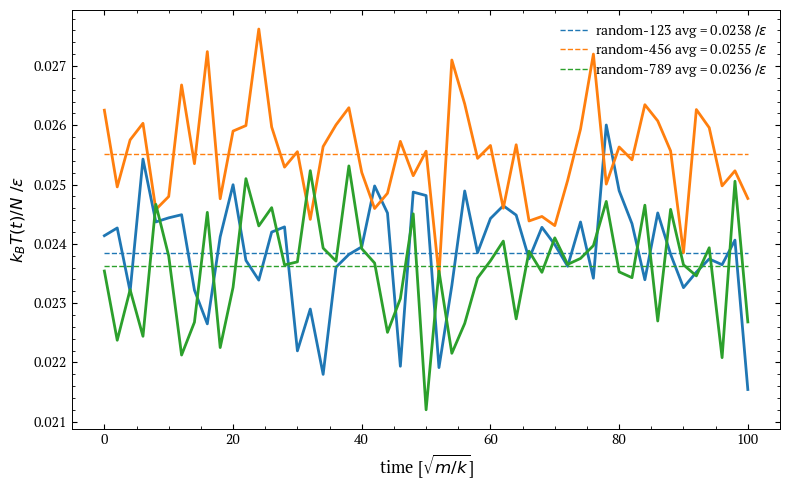

In [31]:
plt.figure(figsize=(8, 5))

for file, label in zip(h5_files, labels):
    with h5py.File(file, "r") as f:
        time = f["observables/temperature/time"][()]
        T = f["observables/temperature/value"][()]
        T_per_particle = T / N

        # Skip initial 10% for average
        skip = int(0.1 * len(T_per_particle))
        T_avg = np.mean(T_per_particle[skip:])

        # Plot and capture color
        line, = plt.plot(time, T_per_particle, linewidth=2.0)
        color = line.get_color()

        # Plot dashed line for average
        plt.hlines(T_avg, xmin=time[0], xmax=time[-1],
                   linestyles='dashed', colors=color,
                   label=f"{label} avg = {T_avg:.4f} $/ \epsilon$")

plt.xlabel(r"time [$\sqrt{m/k}$]", fontsize=12)
plt.ylabel(r"$k_B T(t)/N ~ / \epsilon$", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()